In [47]:
import tensorflow as tf
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from tensorflow.python.keras.optimizers import *
import numpy as np
from sklearn import datasets


iris = datasets.load_iris()

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

#Load dataset
X = iris.data[:, 0]
y = iris.data[:, 2]


#define keras model
model = Sequential()

model.add(Dense(12,input_dim=1,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(1))

#compile the keras model
opt = optimizers.Adam(learning_rate=0.001)
mse = tf.keras.losses.MeanSquaredError(
    reduction=tf.keras.losses.Reduction.SUM)
model.compile(loss=mse, optimizer=opt)

#fit the keras model on the dataset (CPU)
model.fit(X, y, epochs=2000, batch_size=10, verbose=0)
model.summary()

#make class predictions with the model
predictions = model.predict(X)

#summarize the first 10 cases
for i in range(10):
    print('%s => %.2f (expected %.2f)' %(X[i].tolist(), predictions[i], y[i]) )


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_72 (Dense)                │ (None, 12)             │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,049 (4.10 KB)

 Trainable params: 349 (1.36 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 700 (2.74 KB)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
5.1 => 2.00 (expected 1.40)
4.9 => 1.74 (expected 1.40)
4.7 => 1.48 (expected 1.30)
4.6 => 1.35 (expected 1.50)
5.0 => 1.87 (expected 1.40)
5.4 => 2.71 (expected 1.70)
4.6 => 1.35 (expected 1.40)
5.0 => 1.87 (expected 1.50)
4.4 => 1.09 (expected 1.40)
4.9 => 1.74 (expected 1.50)


/tmp/ipython-input-966808761.py:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('%s => %.2f (expected %.2f)' %(X[i].tolist(), predictions[i], y[i]) )


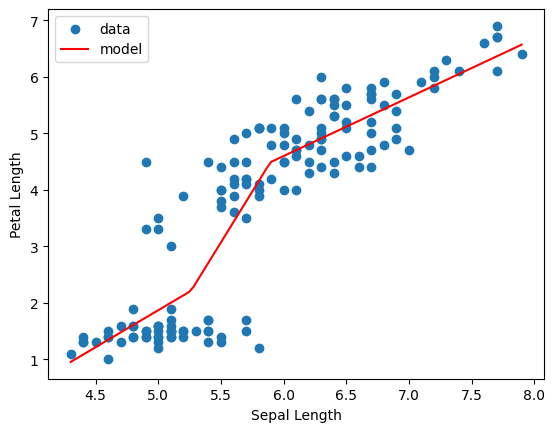

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

number_grid = np.linspace(X.min(), X.max(), 100)
prediction_grid = model(number_grid, training=False).numpy()

plt.scatter(X, y, label='data')
plt.plot(number_grid, prediction_grid, color='red', label='model')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()



